<a href="https://colab.research.google.com/github/PenLoo98/Python-Practice/blob/main/20220927_ML_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(70000, 784)
(70000,)


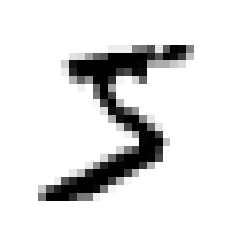

array([ True])

In [ ]:
# 데이터셋을 불러옴
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# 불러온 데이터셋의 key를 불러옴
mnist.keys()

# 데이터 종류를 분류함
X, y = mnist["data"], mnist["target"]

# 출력값 (70000, 784) 7만개가 일렬로 나열되어있음
print(X.shape) 
# 출력값 (70000,) 데이터들의 숫자가 뭔지 정답만 나와있음
print(y.shape)

import matplotlib.pyplot as plt
# X의 첫번째 요소를 불러온다
some_digit = X[0]
# 모양을 28*28로 바꿈
some_digit_image = some_digit.reshape(28, 28)

# 이미지를 표현하는 함수 (출력 형식 조정가능)/ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(some_digit_image, cmap="binary")
# axis 제거 / https://frhyme.github.io/python-lib/plt_axis_off/
plt.axis("off")
plt.show()
y[0]

In [ ]:
# 훈련 데이터와 테스트 데이터를 분류함
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 5면 True, 5가 아니면 False값이 나옴
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# 확률적 경사하강법 분류 라이브러리 불러온다 SGD = Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
# random_state이거 뭐임?
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)
# 학습한 모델이 정답을 도출 출력값 array([True]) => 5가 맞다는 뜻
sgd_classifier.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_classifier)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print( n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)
never_5_cls = Never5Classifier()
# 정답이 너무 많은
cross_val_score(never_5_cls, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print( 'Precision score = ', precision_score(y_train_5, y_train_pred))
print( 'Recall score = ', recall_score(y_train_5, y_train_pred))
print( 'F1 score = ', f1_score(y_train_5, y_train_pred))

Precision score =  0.8370879772350012
Recall score =  0.6511713705958311
F1 score =  0.7325171197343846


In [ ]:
y_scores = sgd_classifier.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

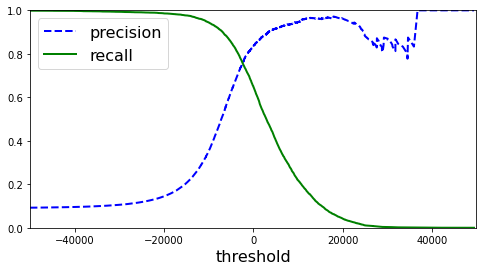

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-50000, 50000])
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
# 다중 출력 분류
# 이미지 잡음을 제거하는 시스템 만들기
import matplotlib
import matplotlib.pyplot as plt
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")



In [ ]:
# 숫자 그림에 노이즈 생성
noise = np.random.randint( 0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
# 노이즈를 한 번 더 넣음 => 교수님: 안그러면 구하기 너무 쉽다고 함, 그냥 빼주면 노이즈가 제거된다
noise = np.random.randint( 0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = y_test

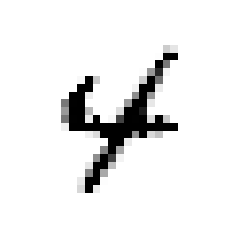

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[5500]])
plot_digit(clean_digit)